In [2]:
#import
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import datetime as dt
import numpy as np
import re
from datetime import datetime


In [3]:
#import csv
alien_duration_shape_df = pd.read_csv('../project-1-alien-analysis/ufo_dates.csv')
alien_duration_shape_df.dropna(inplace = True) 
alien_duration_shape_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
6,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996


In [4]:
#sort by duration

alien_duration_shape_df.sort_values(by=['duration (seconds)'], inplace=True, ascending=False)
alien_duration_shape_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
47795,8/10/2012 21:00,finley,wa,us,light,52623200.0,2 months,There have been several flying objects in a pe...,8/19/2012,46.154167,-119.032778,8,10,21:00,2012
23853,3/1/1994 01:00,menifee,ca,us,unknown,10526400.0,4 months,Sun City / Menifee UFO sightings in 1994,2/22/2005,33.728333,-117.145556,3,1,01:00,1994
39754,6/30/2002 22:00,honolulu,hi,us,circle,6312000.0,years,Green glowing UFOs and some that look like sta...,2/1/2007,21.306944,-157.858333,6,30,22:00,2002
16753,12/31/2009 23:30,livingston,la,us,unknown,6312000.0,new years,The 12 UFO we seen brite yellow like a street ...,2/14/2010,30.501944,-90.747778,12,31,23:30,2009
37252,6/15/2012 21:00,huntington,ny,us,light,6312000.0,1-2 years,Strange lights in the sky that move and follow...,10/14/2013,40.868056,-73.426111,6,15,21:00,2012


In [5]:
#sort by shape
alien_duration_shape_df.sort_values(by=['shape'], inplace=True, ascending=True)
alien_duration_shape_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
38751,6/24/1996 00:30,aurora,co,us,changed,3600.0,1 hour,Obj. hovered 100 ft above car. Red&#44 blue l...,11/2/1999,39.729444,-104.831389,6,24,00:30,1996
3191,10/24/2008 19:53,avila beach,ca,us,changing,600.0,10 minutes,Heading south on the 101 from San Luis Obispo ...,10/31/2008,35.180000,-120.730833,10,24,19:53,2008
39316,6/27/2010 12:00,zionsville,in,us,changing,900.0,15 minutes,30 red balls seen twice,7/6/2010,39.950833,-86.261944,6,27,12:00,2010
47955,8/11/2008 23:00,orlando,fl,us,changing,30.0,30 seconds,pulsating blue- white electrical light object ...,10/31/2008,28.538056,-81.379444,8,11,23:00,2008
41423,7/1/2007 04:00,ooltewah,tn,us,changing,7200.0,2 hours,brillant lights an some think am afraid to say,12/12/2009,35.075000,-85.062222,7,1,04:00,2007


In [6]:
#sort by state
alien_duration_shape_df.sort_values(by=['state'], inplace=True, ascending=True)
alien_duration_shape_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
5421,10/8/2006 14:02,anchorage,ak,us,disk,60.0,1:00,black disc-shaped object rose from behind a mo...,10/30/2006,61.218056,-149.900278,10,8,14:02,2006
20091,2/11/2011 08:00,fairbanks,ak,us,unknown,1200.0,20 min,UFO&#39s sighted Fairbanks/Murphy Dome Feb.11&...,2/18/2011,64.837778,-147.716389,2,11,08:00,2011
12932,1/19/2013 21:00,fairbanks,ak,us,fireball,120.0,2 minutes,4 Balls of Fire Dance in The Northern Sky,6/2/2013,64.837778,-147.716389,1,19,21:00,2013
31993,4/9/2014 11:30,kenai,ak,us,light,7200.0,2 hours,Strange fast moving lights high in the sky,4/11/2014,60.554444,-151.258333,4,9,11:30,2014
59170,9/8/2003 23:30,anchorage,ak,us,light,20.0,20 secs,More stars moving around over Anchorage,9/12/2003,61.218056,-149.900278,9,8,23:30,2003


In [7]:
#describe duration
alien_duration_shape_df["duration (seconds)"].describe()

count    5.801600e+04
mean     3.176655e+03
std      2.313301e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      5.262320e+07
Name: duration (seconds), dtype: float64

In [8]:
#describe all columns
alien_duration_shape_df.describe()

,duration (seconds),latitude,longitude,Month,Day,Year
count,5.801600e+04,58016.000000,58016.000000,58016.000000,58016.000000,58016.000000
mean,3.176655e+03,38.307248,-95.799081,6.865158,15.233039,2006.845163
std,2.313301e+05,5.569755,18.088112,3.306535,8.879275,5.059498
min,1.000000e-02,17.967778,-170.478889,1.000000,1.000000,1993.000000
25%,3.000000e+01,34.075278,-115.136389,4.000000,8.000000,2003.000000
50%,1.800000e+02,38.896667,-90.140694,7.000000,15.000000,2008.000000
75%,6.000000e+02,41.916389,-81.085000,10.000000,23.000000,2011.000000
max,5.262320e+07,70.636944,-65.831667,12.000000,31.000000,2014.000000


In [9]:
# unique shapes
alien_duration_shape_df["shape"].unique()

array(['disk', 'unknown', 'fireball', 'light', 'oval', 'triangle',
       'sphere', 'diamond', 'circle', 'egg', 'other', 'formation',
       'cigar', 'teardrop', 'flash', 'changing', 'cylinder', 'cone',
       'chevron', 'cross', 'rectangle', 'flare', 'round', 'changed',
       'delta', 'pyramid', 'hexagon'], dtype=object)

In [10]:
#average duration 
shape_group= alien_duration_shape_df.groupby('shape')
shape_group['duration (seconds)'].median()


shape
changed      3600.0
changing      480.0
chevron        60.0
cigar         120.0
circle        180.0
cone          300.0
cross         225.0
cylinder      180.0
delta         420.0
diamond       300.0
disk          180.0
egg           180.0
fireball      120.0
flare          30.0
flash          30.0
formation     180.0
hexagon       240.0
light         180.0
other         180.0
oval          180.0
pyramid       120.0
rectangle     120.0
round         452.5
sphere        180.0
teardrop      120.0
triangle      180.0
unknown       180.0
Name: duration (seconds), dtype: float64

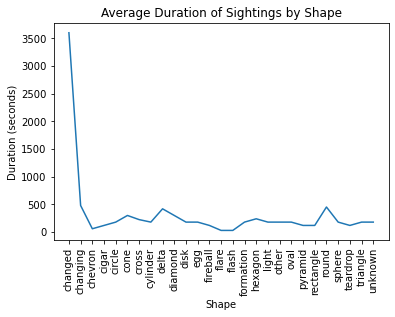

In [11]:
#line plot Average Duration of Sightings by Shape
x=list(shape_group.groups.keys())
y=shape_group['duration (seconds)'].median().values
fig= plt.figure()
plt.title('Average Duration of Sightings by Shape')
plt.xlabel('Shape')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show
plt.savefig('shape_read.png')



In [12]:
#count of duration by date
duration_group= alien_duration_shape_df.groupby('datetime')
duration_group['duration (seconds)'].count()

datetime
1/1/1994 00:00    1
1/1/1994 18:00    1
1/1/1995 02:00    1
1/1/1995 06:00    1
1/1/1995 10:00    1
                 ..
9/9/2013 21:00    2
9/9/2013 21:15    1
9/9/2013 22:00    2
9/9/2013 22:20    1
9/9/2013 23:00    1
Name: duration (seconds), Length: 50650, dtype: int64

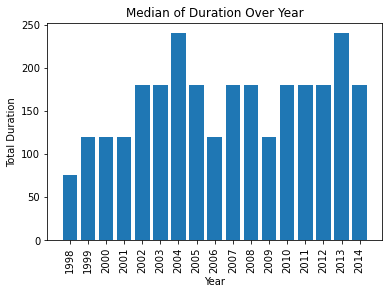

<Figure size 432x288 with 0 Axes>

In [34]:
#duration Over Time
alien_duration_shape_df['yymm'] = pd.DatetimeIndex(alien_duration_shape_df['date posted']).year
shape_dates=alien_duration_shape_df[['yymm','duration (seconds)']]
shape_dates = shape_dates.groupby('yymm')

shape_dates=shape_dates['duration (seconds)'].median()
shape_dates=shape_dates.reset_index()
shape_dates.head()


x = shape_dates['yymm']
y = shape_dates['duration (seconds)']


plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel('Total Duration')
plt.title('Median of Duration Over Year')
plt.xticks(shape_dates['yymm'],rotation=90) # Rotate xaxis labels 90 degrees
plt.show()
plt.savefig('duration_read.png')

In [23]:
shape_dates.sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001ED8B6B1A58>>

In [ ]:
# sort durationn (seconds) ascending order
alien_duration_shape_df.sort_values ('duration (seconds)', ascending =True)

In [ ]:
#find outliers
q1=alien_duration_shape_df['duration (seconds)'].quantile(0.25)
q3=alien_duration_shape_df['duration (seconds)'].quantile(0.75)
IQR=q3-q1
lowquebond=q1-1.5*IQR
highquebond=q3+1.5*IQR

print(f"Values below {lowquebond} could be outliers.")
print(f"Values above {highquebond} could be outliers.")
print(IQR)